In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from itertools import combinations

# 최적의 열 선택

In [ ]:
# 1차 변수 제거
data = pd.read_csv("/content/최종 데이터프레임.csv", encoding='cp949', thousands=',')
data = data.drop(columns=['행정동','지역아동센터','주점 개수','다중이용시설','행정동 면적','장애인 인구','노인 인구','불법주정차 단속건수','버스 정류장 개수','어린이 보호구역 개수','옐로카펫','학교(전체)','무인 단속 카메라','시설물 개수','과속방지턱','따릉이 대여소 개수'])
## '안전지표'랑 상관관계 낮은거, 과속방지턱(실수), 행정동, 따릉이 삭제

In [ ]:
data.head()

,유아시설,어린이 인구,전체 인구,어린이 비율,노인 비율,장애인 비율,공원 수,주차장 개수,노인장애인보호구역,공동주택,차량_등록대수,유동인구 수,CCTV 총합,교통사고 사망건수,사고 건수,횡단보도 수,교통안전지표
0,30,7791,41326,0.1885,0.1179,0.0258,1,429,0,53,15584,32482,160,9,265,14,0.0715
1,13,2375,24888,0.0954,0.1296,0.0295,1,493,1,29,9043,31546,107,4,133,17,0.0615
2,13,2372,19417,0.1222,0.1813,0.0370,0,849,0,9,7002,16456,128,0,129,3,0.0737
3,21,3047,29554,0.1031,0.2518,0.1235,0,235,2,18,9151,55894,112,2,217,45,0.0962
4,27,3596,33130,0.1085,0.1624,0.0420,1,2041,2,1,9189,25690,357,1,238,6,0.1043


In [ ]:
# 가능한 모든 칼럼 조합 생성
all_columns = data.columns.tolist()
min_subset_length = 13  # 최소 칼럼 수
max_subset_length = 13  # 최대 칼럼 수
all_combinations = []

for r in range(min_subset_length, max_subset_length + 1):
    all_combinations.extend(combinations(all_columns, r))

best_silhouette_score = -1
best_model = None
best_cluster_count = None
best_column_combination = None  # 최적의 칼럼 조합 저장 변수

# 각 칼럼 조합에 대해 모델링 및 실루엣 계수 계산
for combination in all_combinations:
    subset_data = data[list(combination)]

    # 정규화
    scaler = StandardScaler()
    subset_data_normalized = scaler.fit_transform(subset_data)

    # PCA
    pca = PCA(n_components=3)
    subset_data_pca = pca.fit_transform(subset_data_normalized)

    for cluster_count in range(2, 6):
        # K-means 모델링 및 실루엣 계수 계산
        kmeans = KMeans(n_clusters=cluster_count)
        kmeans_labels = kmeans.fit_predict(subset_data_pca)
        kmeans_silhouette_score = silhouette_score(subset_data_pca, kmeans_labels)

        # GMM 모델링 및 실루엣 계수 계산
        gmm = GaussianMixture(n_components=cluster_count)
        gmm_labels = gmm.fit_predict(subset_data_pca)
        gmm_silhouette_score = silhouette_score(subset_data_pca, gmm_labels)

        # 가장 높은 실루엣 계수를 가지는 모델 및 군집 개수 선택
        if kmeans_silhouette_score > best_silhouette_score:
            best_silhouette_score = kmeans_silhouette_score
            best_model = 'K-means'
            best_cluster_count = cluster_count
            best_column_combination = combination  # 최적의 칼럼 조합 저장
        if gmm_silhouette_score > best_silhouette_score:
            best_silhouette_score = gmm_silhouette_score
            best_model = 'GMM'
            best_cluster_count = cluster_count
            best_column_combination = combination  # 최적의 칼럼 조합 저장

print("Best Model:", best_model)
print("Best Cluster Count:", best_cluster_count)
print("Best Silhouette Score:", best_silhouette_score)
print("Best Column Combination:", best_column_combination)


결과로 '유아시설', '어린이 인구', '어린이  비율', '노인 비율', '장애인 비율', '공원 수', '주차장 개수', '노인장애인보호구역', '공동주택', '유동인구 수', 'CCTV 총합', '교통사고 사망건수', '횡단보도 수' 칼럼 선택

Best Model: K-means

Best Cluster Count: 5

Best Silhouette Score: 0.5492724682766491

# 선택 결과로 다시

In [ ]:
# 변수 제거
data = pd.read_csv("/content/최종 데이터프레임.csv", encoding='UTF-8', thousands=',')
data = data.drop(columns=['행정동','옐로카펫','지역아동센터','학교(전체)','전체 인구','장애인 인구','따릉이 대여소 개수','노인 인구','주점 개수','차량_등록대수','다중이용시설','무인 단속 카메라','과속방지턱','불법주정차 단속건수','사고 건수','버스 정류장 개수','행정동 면적','시설물 개수','교통안전지표','어린이 보호구역 개수'])

In [ ]:
# 정규화

# 모든 열 정규화
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# 정규화된 데이터를 DataFrame으로 변환 (선택적)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

## PCA

In [ ]:
# 강제로 3개로 할당

# PCA 모델 초기화
pca = PCA(n_components=3)

# PCA 모델 적합
data_pca = pca.fit_transform(data_normalized)

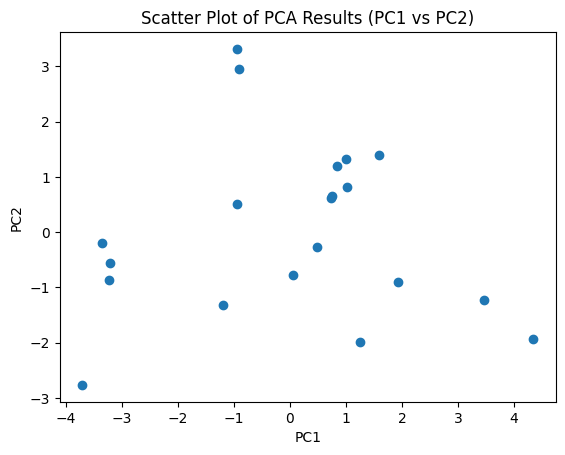

In [ ]:
import matplotlib.pyplot as plt

# PCA 시각화

# 주성분 분석 결과로 변환된 데이터의 첫 번째와 두 번째 주성분을 사용하여 산점도 그리기
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PCA Results (PC1 vs PC2)')
plt.show()

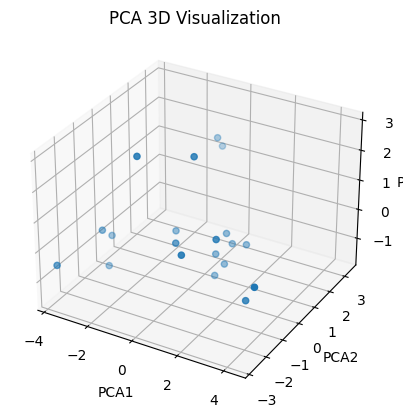

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터셋의 첫 번째, 두 번째, 세 번째 주성분 사용하여 3D 산점도 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('PCA 3D Visualization')
plt.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x=data_pca[:, 0], y=data_pca[:, 1], z=data_pca[:, 2], mode='markers')])
fig.update_layout(scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))
fig.show()

## K-means

선택된 열로 다시

In [ ]:
# K-means

# 후보 클러스터 개수 설정
candidate_clusters_kmeans = [2, 3, 4, 5]

# 각 클러스터 개수에 대해 K-means를 적용하고 실루엣 계수 확인
best_silhouette_score_kmeans = -1
best_kmeans_clusters = None
best_k_kmeans = 0

for k in candidate_clusters_kmeans:
    # K-means 모델 초기화
    kmeans = KMeans(n_clusters=k, random_state=42)

    # K-means 모델 적합
    kmeans_clusters = kmeans.fit_predict(data_pca)

    # 실루엣 계수 계산
    silhouette_avg_kmeans = silhouette_score(data_pca, kmeans_clusters)
    print(f"Number of clusters: {k}, Silhouette score: {silhouette_avg_kmeans}")

    # 최적의 실루엣 계수를 가진 클러스터 개수 찾기
    if silhouette_avg_kmeans > best_silhouette_score_kmeans:
        best_silhouette_score_kmeans = silhouette_avg_kmeans
        best_kmeans_clusters = kmeans_clusters
        best_k_kmeans = k

# 최적의 클러스터 개수로 K-means를 다시 초기화하고 적합
kmeans = KMeans(n_clusters=best_k_kmeans, random_state=42)
kmeans.fit(data_pca)

# 최적의 클러스터 개수로 K-means 군집화 결과 출력
print("Best number of clusters for K-means:", best_k_kmeans)
unique_best_clusters_kmeans = np.unique(best_kmeans_clusters)
for cluster in unique_best_clusters_kmeans:
    cluster_size = np.sum(best_kmeans_clusters == cluster)
    print(f"Cluster {cluster}: {cluster_size} samples")

Number of clusters: 2, Silhouette score: 0.38418207107268537
Number of clusters: 3, Silhouette score: 0.3975865457885397
Number of clusters: 4, Silhouette score: 0.4435392091118898
Number of clusters: 5, Silhouette score: 0.5492724682766491
Best number of clusters for K-means: 5
Cluster 0: 2 samples
Cluster 1: 4 samples
Cluster 2: 4 samples
Cluster 3: 8 samples
Cluster 4: 2 samples


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

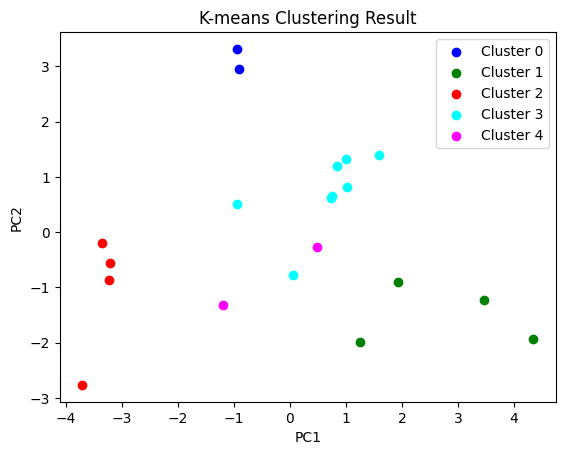

In [ ]:
# K-means 2차원 시각화

import matplotlib.pyplot as plt

# 군집 개수에 따라 색상을 다르게 지정
colors = ['blue', 'green', 'red', 'cyan', 'magenta']

# 각 데이터 포인트를 군집별로 색칠하여 시각화
for cluster in range(best_k_kmeans):
    cluster_points = data_pca[best_kmeans_clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster], label=f'Cluster {cluster}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Result')
plt.legend()
plt.show()


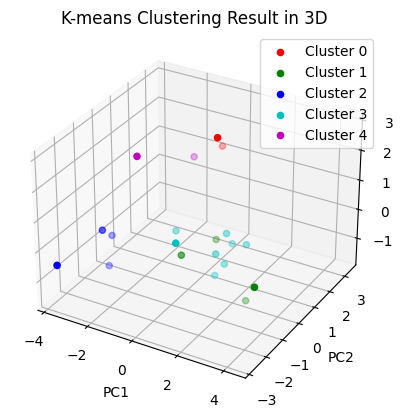

In [ ]:
# 3차원 시각화

from mpl_toolkits.mplot3d import Axes3D

# PCA 모델 초기화 (주성분 개수를 3으로 설정)
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_normalized)

# 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 클러스터를 다른 색으로 나타내기 위한 색상 맵
colors = ['r', 'g', 'b', 'c', 'm']

# 각 클러스터를 3D 공간에 플롯
for cluster in range(best_k_kmeans):
    cluster_points = data_pca_3d[best_kmeans_clusters == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=colors[cluster], label=f'Cluster {cluster}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('K-means Clustering Result in 3D')

plt.legend()
plt.show()


In [ ]:
# 3차원 움직이게

import plotly.graph_objs as go
import random

# 클러스터별 랜덤한 RGB 값 생성
cluster_colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(best_k_kmeans)]

# 클러스터별로 scatter plot을 생성하여 traces 리스트에 추가
traces = []
for i in range(best_k_kmeans):
    cluster_points = data_pca_3d[best_kmeans_clusters == i]
    trace = go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        marker=dict(color=cluster_colors[i], size=5),
        name=f'Cluster {i}'
    )
    traces.append(trace)

# 레이아웃 지정
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    ),
    title='K-means Clustering Result in 3D'
)

# 그래프 그리기
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [ ]:
import plotly.graph_objs as go
import random

# 클러스터별 색깔 지정
colors = ['blue', 'green', 'red', 'cyan', 'magenta']

# 클러스터별로 scatter plot을 생성하여 traces 리스트에 추가
traces = []
for i in range(best_k_kmeans):
    cluster_points = data_pca_3d[best_kmeans_clusters == i]
    trace = go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        marker=dict(color=colors[i], size=5),
        name=f'Cluster {i}'
    )
    traces.append(trace)

# 레이아웃 지정
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    ),
    title='K-means Clustering Result in 3D'
)

# 그래프 그리기
fig = go.Figure(data=traces, layout=layout)
fig.show()
